link to data: https://www.instacart.com/datasets/grocery-shopping-2017

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
order_train = pd.read_csv('../instacart/order_products__train.csv')
order_prior = pd.read_csv('../instacart/order_products__prior.csv')
aisles = pd.read_csv('../instacart/aisles.csv')
departments = pd.read_csv('../instacart/departments.csv')
products = pd.read_csv('../instacart/products.csv')
orders = pd.read_csv('../instacart/orders.csv')

In [5]:
# Merge prior and training to get full union of data
df = pd.merge(order_train, order_prior, how='outer')

In [6]:
df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [7]:
# order_count is the total orders per order id
order_count = df.groupby('order_id').count().reset_index()

In [8]:
order_count.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,8,8,8
1,2,9,9,9
2,3,8,8,8
3,4,13,13,13
4,5,26,26,26


In [9]:
# merge together so order id's can have total order count
merge_df = pd.merge(df, order_count, on='order_id')

In [10]:
merge_df.head()

,order_id,product_id_x,add_to_cart_order_x,reordered_x,product_id_y,add_to_cart_order_y,reordered_y
0,1,49302,1,1,8,8,8
1,1,11109,2,1,8,8,8
2,1,10246,3,0,8,8,8
3,1,49683,4,0,8,8,8
4,1,43633,5,1,8,8,8


In [11]:
# drop unneeded columns
merge_df.drop(['add_to_cart_order_y','reordered_y'], axis = 1, inplace = True)

In [12]:
merge_df.head()

,order_id,product_id_x,add_to_cart_order_x,reordered_x,product_id_y
0,1,49302,1,1,8
1,1,11109,2,1,8
2,1,10246,3,0,8
3,1,49683,4,0,8
4,1,43633,5,1,8


In [13]:
# rename columns
merge_df.columns = ['order_id', 'product_id','add_to_cart_order','reordered','order_count']

In [14]:
merge_df

,order_id,product_id,add_to_cart_order,reordered,order_count
0,1,49302,1,1,8
1,1,11109,2,1,8
2,1,10246,3,0,8
3,1,49683,4,0,8
4,1,43633,5,1,8
5,1,13176,6,0,8
6,1,47209,7,0,8
7,1,22035,8,1,8
8,36,39612,1,0,8
9,36,19660,2,1,8


In [15]:
# merge with products on product_id to get product_name
df = pd.merge(merge_df, products, on='product_id')

In [16]:
# drop unneeded columns
df.drop(['aisle_id','department_id'], axis = 1, inplace = True)

In [17]:
#find just orders where count is 10
orders_top_10 = df[df.order_count == 10].sort_values('order_id')

In [18]:
orders_top_10.head()

,order_id,product_id,add_to_cart_order,reordered,order_count,product_name
31055612,31,49156,7,1,10,Organic Whole Grain Sprouted Quinoa
5108098,31,21903,3,1,10,Organic Baby Spinach
10970859,31,47900,9,1,10,"Uncured, No Sugar, Hickory Smoked Bacon"
27321924,31,48946,1,1,10,Earl Grey Tea
16634950,31,25647,6,1,10,Heirloom Tomato


In [19]:
# Unique Products
orders_top_10.product_name.drop_duplicates().count()

39345

In [20]:
# Top Counts of Products
orders_top_10.groupby('product_name').product_name.count().sort_values(ascending = False)

product_name
Banana                                                           29198
Bag of Organic Bananas                                           21247
Organic Strawberries                                             14045
Organic Baby Spinach                                             13548
Organic Hass Avocado                                             11651
Organic Avocado                                                  10378
Large Lemon                                                       8355
Strawberries                                                      7885
Organic Whole Milk                                                7818
Limes                                                             7253
Organic Raspberries                                               7073
Organic Yellow Onion                                              5961
Organic Garlic                                                    5679
Organic Zucchini                                                

In [21]:
# sample data for performance 
df_samp = orders_top_10.sample(n=10000)

In [22]:
# product counts grouped by product
df_samp.groupby('product_name').product_name.count().sort_values(ascending = False)

product_name
Banana                                                 159
Bag of Organic Bananas                                 105
Organic Baby Spinach                                    89
Organic Strawberries                                    86
Organic Hass Avocado                                    70
Organic Avocado                                         65
Organic Whole Milk                                      57
Large Lemon                                             49
Organic Large Extra Fancy Fuji Apple                    47
Limes                                                   44
Cucumber Kirby                                          41
Organic Garlic                                          40
Organic Raspberries                                     39
Organic Lemon                                           35
Organic Baby Carrots                                    33
Organic Yellow Onion                                    32
Organic Fuji Apple                         

In [23]:
# unique products
df_samp.product_name.drop_duplicates().count()

4465

In [24]:
# dummy variables
df_dummies = pd.get_dummies(df_samp.product_name)

In [25]:
# sorting on index smallest to largest
df = df_samp.sort_values('order_id').reset_index()

In [26]:
# drop index
df = df.drop('index', axis = 1)

In [27]:
# rerun dummy variables
df_dummies = pd.get_dummies(df.product_name)

In [28]:
df_dummies

,#2 Coffee Filters,0% Fat Free Organic Milk,0% Fat Greek Yogurt Vanilla,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,1 Apple + 1 Mango Fruit Bar,1 Apple + 1 Pear Fruit Bar,1 Liter,1 Ply Paper Towels,1% Chocolate Milk,...,Zero Coke Soda Mini Bottles,Zero Rise Orange,Zero Soda,Zero Ultra Energy Drink,Zero XXX Acai Blueberry Pomegranate,Ziti Bolognese Pasta Bowl,Zucchini Noodles,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# merge to get a union of data. get_dummies() only had the dummy variables so needed to merge
df_dummies_merge = pd.merge(df, df_dummies, left_index = True, right_index = True)

# Clustering Dummy Variables

In [30]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [31]:
# kmeans k=3
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print ('Labels:', labels)
print ('')
print ('Centroids:', centroids)
print ('')
print ('Inertia:', inertia)

Labels: [0 0 0 ... 0 0 0]

Centroids: [[ 3.05374593e-04  1.01791531e-04  1.01791531e-04 ...  1.01791531e-04
   1.01791531e-04  2.03583062e-04]
 [ 0.00000000e+00 -2.71050543e-20 -2.71050543e-20 ... -2.71050543e-20
  -2.71050543e-20 -5.42101086e-20]
 [-1.13841228e-18  2.57498016e-19  2.57498016e-19 ...  2.57498016e-19
   2.57498016e-19  5.14996032e-19]]

Inertia: 9813.441775244282


In [33]:
print ('Silhouette Score:', metrics.silhouette_score(df_dummies, labels, metric='euclidean'))

Silhouette Score: 0.01855591978001255


In [34]:
# adding label to the dataframe
df_dummies['label'] = labels

In [35]:
df_dummies

,#2 Coffee Filters,0% Fat Free Organic Milk,0% Fat Greek Yogurt Vanilla,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,1 Apple + 1 Mango Fruit Bar,1 Apple + 1 Pear Fruit Bar,1 Liter,1 Ply Paper Towels,1% Chocolate Milk,...,Zero Rise Orange,Zero Soda,Zero Ultra Energy Drink,Zero XXX Acai Blueberry Pomegranate,Ziti Bolognese Pasta Bowl,Zucchini Noodles,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# merge on index
df_dummies_merge = pd.merge(df, df_dummies, left_index = True, right_index = True)

In [37]:
df_dummies_merge

,order_id,product_id,add_to_cart_order,reordered,order_count,product_name,#2 Coffee Filters,0% Fat Free Organic Milk,0% Fat Greek Yogurt Vanilla,0% Greek Strained Yogurt,...,Zero Rise Orange,Zero Soda,Zero Ultra Energy Drink,Zero XXX Acai Blueberry Pomegranate,Ziti Bolognese Pasta Bowl,Zucchini Noodles,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,label
0,44,28012,6,0,10,Clover Honey Bear,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,744,31981,1,1,10,1% Low Fat Milk,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1369,1696,2,1,10,Honey Oat,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1893,24838,1,1,10,Unsweetened Almondmilk,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1904,10132,5,1,10,Organic American Cheese Singles,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1904,7388,8,1,10,"Salsa, Roja, Hot",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2084,39975,2,0,10,Taco Seasoned Ground Turkey,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2266,12130,4,0,10,Premium Chunk White Albacore in Water Tuna,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2423,14444,10,0,10,Smokehouse Almonds,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3106,261,4,0,10,Organic Southwestern Burrito,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# rename back to df
df = df_dummies_merge

In [39]:
# remove dummy variables
orders_and_labels = df[['order_id','product_id','add_to_cart_order','reordered','product_name','label']]

In [40]:
# print label distribution
print(orders_and_labels.groupby('label').order_id.count())

label
0    9824
1      17
2     159
Name: order_id, dtype: int64


# Findings

- High inertia, low silhouette Score - not the greatest model for k=3
- Distribution in centroids is not even
- Will re-run model on other k's

# k=5

In [68]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_dummies)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print ('Labels:', labels)
print ('')
print ('Centroids:', centroids)
print ('')
print ('Inertia:', inertia)

print ('Silhouette Score:', metrics.silhouette_score(df_dummies, labels, metric='euclidean'))



Labels: [0 0 0 ... 4 0 0]

Centroids: [[ 3.69549150e-04  1.23183050e-04  1.23183050e-04 ...  1.23183050e-04
   2.46366100e-04  1.46095097e-01]
 [ 1.30104261e-18  1.08420217e-19  1.08420217e-19 ...  1.08420217e-19
   2.16840434e-19  5.73843931e+01]
 [ 1.02999206e-18  3.25260652e-19  3.25260652e-19 ...  3.25260652e-19
   6.50521303e-19  8.48730650e+01]
 [ 2.22261445e-18 -5.82758668e-19 -5.82758668e-19 ... -5.82758668e-19
  -1.16551734e-18  3.71640798e+01]
 [ 3.46944695e-18 -1.51788304e-18 -1.51788304e-18 ... -1.51788304e-18
  -3.03576608e-18  1.44317585e+01]]

Inertia: 74641.3799874496
Silhouette Score: 0.8272356083054985


In [43]:
df_dummies['label'] = labels

df_dummies_merge = pd.merge(df, df_dummies, left_index = True, right_index = True)

df = df_dummies_merge

orders_and_labels = df[['order_id','product_id','add_to_cart_order','reordered','product_name','label']]

print(orders_and_labels.groupby('label').order_id.count())

label
0    9746
1     159
2      86
3       4
4       5
Name: order_id, dtype: int64


In [71]:
cols = df_dummies.columns[:-1]
sns.pairplot(df_dummies, x_vars=cols, y_vars= cols, hue='label')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10ffed488> (for post_execute):


ValueError: Image size of 803700x803700 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 803700x803700 pixels is too large. It must be less than 2^16 in each direction.

intertia is decreasing while Silhouette Score is increasing. Getting better.....slowly

# k=10

In [44]:
k = 10
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_dummies)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print ('Labels:', labels)
print ('')
print ('Centroids:', centroids)
print ('')
print ('Inertia:', inertia)

print ('Silhouette Score:', metrics.silhouette_score(df_dummies, labels, metric='euclidean'))



Labels: [0 0 0 ... 4 0 0]

Centroids: [[ 3.15424246e-04  1.05141415e-04  1.05141415e-04 ...  1.05141415e-04
   2.10282830e-04  9.78384040e-16]
 [-1.13841228e-18  2.57498016e-19  2.57498016e-19 ...  2.57498016e-19
   5.14996032e-19  1.00000000e+00]
 [ 0.00000000e+00 -1.35525272e-20 -1.35525272e-20 ... -1.35525272e-20
  -2.71050543e-20  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.04731412e-19  2.71050543e-20  2.71050543e-20 ...  2.71050543e-20
   5.42101086e-20  2.14736842e+00]
 [ 0.00000000e+00  6.77626358e-20  6.77626358e-20 ...  6.77626358e-20
   1.35525272e-19  0.00000000e+00]]

Inertia: 9541.320069282647
Silhouette Score: 0.04799767439041582


In [46]:
df_dummies['label'] = labels

df_dummies_merge = pd.merge(df, df_dummies, left_index = True, right_index = True)

df = df_dummies_merge

orders_and_labels = df[['order_id','product_id','add_to_cart_order','reordered','product_name','label']]

print(orders_and_labels.groupby('label').order_id.count())

label
0    9511
1     159
2       9
3       6
4     105
5      70
6       7
7       3
8      95
9      35
Name: order_id, dtype: int64


# k=50

In [47]:
k = 50
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_dummies)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print ('Labels:', labels)
print ('')
print ('Centroids:', centroids)
print ('')
print ('Inertia:', inertia)

print ('Silhouette Score:', metrics.silhouette_score(df_dummies, labels, metric='euclidean'))



Labels: [0 0 0 ... 3 0 0]

Centroids: [[ 3.50549194e-04  1.16849731e-04  1.16849731e-04 ...  1.16849731e-04
   2.33699462e-04  2.59514632e-14]
 [ 0.00000000e+00 -2.71050543e-20 -2.71050543e-20 ... -2.71050543e-20
  -5.42101086e-20  7.75000000e+00]
 [ 0.00000000e+00 -2.71050543e-20 -2.71050543e-20 ... -2.71050543e-20
  -5.42101086e-20  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -8.32667268e-17]
 [ 0.00000000e+00 -1.35525272e-20 -1.35525272e-20 ... -1.35525272e-20
  -2.71050543e-20  2.77555756e-17]
 [ 0.00000000e+00  4.06575815e-20  4.06575815e-20 ...  4.06575815e-20
   8.13151629e-20 -1.11022302e-16]]

Inertia: 8624.683796243256
Silhouette Score: 0.14013898506441713


In [49]:
df_dummies['label'] = labels

df_dummies_merge = pd.merge(df, df_dummies, left_index = True, right_index = True)

df = df_dummies_merge

orders_and_labels = df[['order_id','product_id','add_to_cart_order','reordered','product_name','label']]

print(orders_and_labels.groupby('label').order_id.count())

label
0     8558
1       12
2       11
3      111
4       40
5       77
6       49
7       44
8      168
9       65
10       7
11      89
12       5
13      39
14      35
15      20
16      28
17       4
18       9
19       6
20       5
21      25
22      18
23      47
24      24
25      13
26      22
27       4
28       5
29      10
30      57
31      28
32      86
33      13
34      24
35      15
36      15
37      13
38      15
39      13
40       6
41       5
42      10
43       6
44      41
45      29
46      14
47      23
48       7
49      30
Name: order_id, dtype: int64


Although centroid 0 has by far the most amount, k=50 has a much better distribution between the centroids than k=3

# One last time ..... k=100

In [50]:
k = 100
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_dummies)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print ('Labels:', labels)
print ('')
print ('Centroids:', centroids)
print ('')
print ('Inertia:', inertia)

print ('Silhouette Score:', metrics.silhouette_score(df_dummies, labels, metric='euclidean'))



Labels: [ 0  0  0 ... 17  0  0]

Centroids: [[ 3.84024578e-04  1.28008193e-04  1.28008193e-04 ...  1.28008193e-04
   2.56016385e-04  1.53609831e-03]
 [ 0.00000000e+00 -2.71050543e-20 -2.71050543e-20 ... -2.71050543e-20
  -5.42101086e-20  3.93157895e+01]
 [-7.58941521e-19  2.71050543e-20  2.71050543e-20 ...  2.71050543e-20
   5.42101086e-20  1.09270833e+01]
 ...
 [ 0.00000000e+00 -1.35525272e-20 -1.35525272e-20 ... -1.35525272e-20
  -2.71050543e-20  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

Inertia: 8004.591178392828
Silhouette Score: 0.2068826489106993


In [52]:
df_dummies['label'] = labels

df_dummies_merge = pd.merge(df, df_dummies, left_index = True, right_index = True)

df = df_dummies_merge

orders_and_labels = df[['order_id','product_id','add_to_cart_order','reordered','product_name','label']]

print(orders_and_labels.groupby('label').order_id.count())

label
0     7812
1       19
2       96
3        9
4       77
5       14
6       67
7       24
8       20
9       15
10     168
11      49
12      86
13      18
14      47
15      35
16      65
17     111
18      29
19      20
20      10
21      37
22      11
23      13
24      13
25      15
26      15
27      12
28      32
29      39
      ... 
70       4
71       3
72       4
73       9
74      11
75      10
76       2
77      18
78      11
79       5
80      20
81       5
82      32
83      11
84      28
85      15
86      14
87      33
88       5
89       9
90       6
91       4
92      13
93      12
94       9
95      15
96       6
97       7
98       4
99       5
Name: order_id, Length: 100, dtype: int64


# EDA on data with labels

In [53]:
orders_and_labels

,order_id,product_id,add_to_cart_order,reordered,product_name,label
0,44,28012,6,0,Clover Honey Bear,0
1,744,31981,1,1,1% Low Fat Milk,0
2,1369,1696,2,1,Honey Oat,0
3,1893,24838,1,1,Unsweetened Almondmilk,0
4,1904,10132,5,1,Organic American Cheese Singles,0
5,1904,7388,8,1,"Salsa, Roja, Hot",0
6,2084,39975,2,0,Taco Seasoned Ground Turkey,0
7,2266,12130,4,0,Premium Chunk White Albacore in Water Tuna,0
8,2423,14444,10,0,Smokehouse Almonds,0
9,3106,261,4,0,Organic Southwestern Burrito,0


In [54]:
merge1 = pd.merge(orders_and_labels, orders)

In [55]:
merge1

,order_id,product_id,add_to_cart_order,reordered,product_name,label,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,44,28012,6,0,Clover Honey Bear,0,183833,prior,3,6,17,1.0
1,744,31981,1,1,1% Low Fat Milk,0,70318,prior,6,5,20,6.0
2,1369,1696,2,1,Honey Oat,0,53694,prior,25,6,19,4.0
3,1893,24838,1,1,Unsweetened Almondmilk,0,67816,prior,13,6,22,11.0
4,1904,10132,5,1,Organic American Cheese Singles,0,164514,prior,8,4,7,8.0
5,1904,7388,8,1,"Salsa, Roja, Hot",0,164514,prior,8,4,7,8.0
6,2084,39975,2,0,Taco Seasoned Ground Turkey,0,161185,prior,3,0,14,3.0
7,2266,12130,4,0,Premium Chunk White Albacore in Water Tuna,0,75231,prior,1,4,18,NaN
8,2423,14444,10,0,Smokehouse Almonds,0,87402,prior,50,3,21,5.0
9,3106,261,4,0,Organic Southwestern Burrito,0,107783,prior,20,4,19,26.0


In [67]:
print('mean')
print(merge1.groupby('label').order_hour_of_day.mean())
print('median')
print(merge1.groupby('label').order_hour_of_day.median())
print('max')
print(merge1.groupby('label').order_hour_of_day.max())
print('min')
print(merge1.groupby('label').order_hour_of_day.min())

mean
label
0     13.507424
1     15.052632
2     14.218750
3     13.444444
4     13.844156
5     16.214286
6     13.597015
7     14.250000
8     12.700000
9     14.133333
10    13.386905
11    13.510204
12    13.697674
13    12.944444
14    13.787234
15    13.600000
16    13.015385
17    14.234234
18    14.448276
19    14.800000
20    11.900000
21    13.081081
22    14.272727
23    13.384615
24    11.384615
25    12.533333
26    13.200000
27    15.166667
28    12.562500
29    12.692308
        ...    
70     9.500000
71    11.666667
72    14.000000
73    14.444444
74    14.181818
75    12.400000
76    12.000000
77    14.611111
78    15.545455
79    14.200000
80    13.700000
81    12.800000
82    14.468750
83    13.000000
84    12.035714
85    12.466667
86    14.285714
87    12.909091
88    12.600000
89    12.000000
90    12.166667
91    12.500000
92    13.692308
93    14.250000
94    14.111111
95    13.400000
96    13.333333
97    14.714286
98    13.500000
99    13.400000
Name: order_h

In [66]:
print('mean')
print(merge1.groupby('label').days_since_prior_order.mean())
print('median')
print(merge1.groupby('label').days_since_prior_order.median())
print('max')
print(merge1.groupby('label').days_since_prior_order.max())
print('min')
print(merge1.groupby('label').days_since_prior_order.min())

mean
label
0     11.033745
1     12.000000
2     13.154762
3      8.666667
4     10.094595
5      8.000000
6     11.238095
7     12.043478
8     14.150000
9     16.571429
10    10.506410
11    11.431818
12     9.317073
13     6.941176
14     9.391304
15    10.281250
16    12.654545
17     9.252336
18    10.200000
19    14.944444
20     9.700000
21    11.823529
22    11.272727
23    17.200000
24     9.692308
25    10.416667
26    11.866667
27     9.181818
28    10.600000
29    11.810811
        ...    
70     9.500000
71     6.000000
72     5.000000
73     9.444444
74    11.000000
75    14.800000
76     7.500000
77    11.562500
78    13.272727
79    15.600000
80    11.000000
81    11.600000
82    11.645161
83     7.900000
84    10.629630
85     8.083333
86    13.214286
87    10.900000
88    13.200000
89    14.875000
90     9.833333
91    12.250000
92    10.076923
93     9.500000
94     9.777778
95     8.307692
96    10.500000
97    16.857143
98     8.750000
99     6.000000
Name: days_si

In [58]:
# Product that occurs the most in each centroid
merge1.groupby('label').product_name.max()

label
0                            with Crispy Almonds Cereal
1                                 Organic Russet Potato
2                                    Panko Bread Crumbs
3     Pop-Tarts Frosted Brown Sugar Cinnamon Toaster...
4                                 Sparkling Water Berry
5                            Grape White/Green Seedless
6                                    Organic Whole Milk
7                                       Red Vine Tomato
8                                             Spaghetti
9                     Organic Garnet Sweet Potato (Yam)
10                                               Banana
11                                          Large Lemon
12                                 Organic Strawberries
13                                Organic D'Anjou Pears
14                     Organic Low Sodium Chicken Broth
15                                        Organic Lemon
16                                      Organic Avocado
17                                        

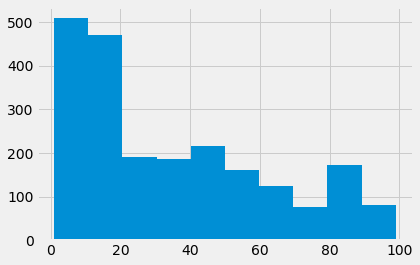

In [79]:
#histogram without centroid 0
without_zero = merge1[merge1.label != 0]
without_zero.label.hist()

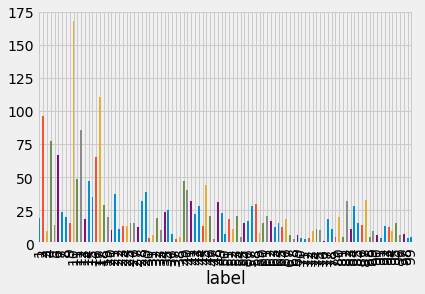

In [81]:
# product counts grouped by label (without 0)
without_zero.groupby('label').product_name.count().plot(kind='bar')

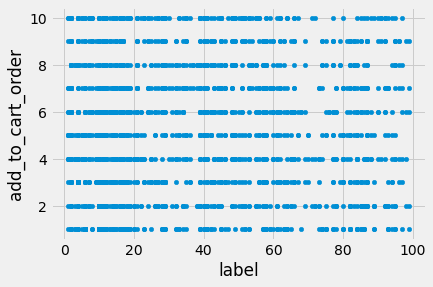

In [85]:
# scatter plot of label vs add_to_cart_order
without_zero.plot(kind='scatter', x='label', y='add_to_cart_order')

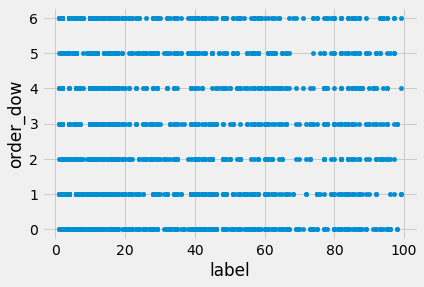

In [86]:
# scatter label vs order_dow
without_zero.plot(kind='scatter', x='label', y='order_dow')

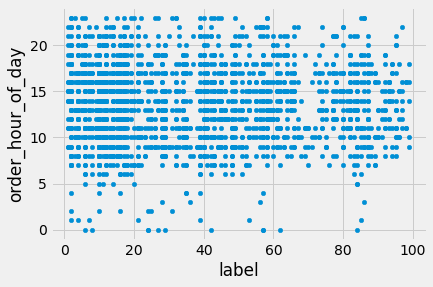

In [87]:
# scatter label vs order_hour_of_day
without_zero.plot(kind='scatter', x='label', y='order_hour_of_day')

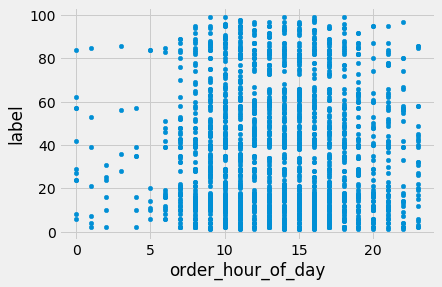

In [89]:
# scatter order_hour_of_day vs label
without_zero.plot(kind='scatter', x='order_hour_of_day', y='label')

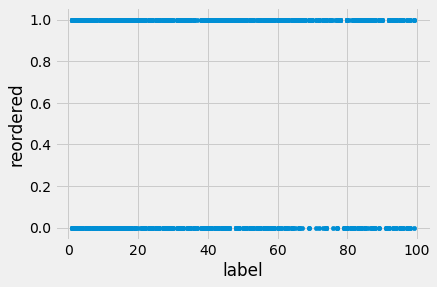

In [90]:
# scatter label vs reordered
without_zero.plot(kind='scatter', x='label', y='reordered')